Análisis de datos SAMU: Llamadas 131
===================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date, datetime, time, timedelta
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
#locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#importo sólo algunas de mis funciones, dejo otras excluídas....

cargo algunos scripts que me suelen servir para análisis

In [2]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())

['/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc']

# Recojo la BD

In [3]:
BD = pd.read_pickle('./llamadas_contraspaso.pkl')
BD.head(2)

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin,Trapaso
0,2017-02-22 20:54:07,Desde SAMU,SIP,Trunk,204.0,9.904491e+08,NaN,Contestada,12,8,2017-02-22 20:54:19,No
1,2017-02-22 20:54:30,Desde SAMU,SIP,Trunk,204.0,9.992239e+09,NaN,Contestada,20,16,2017-02-22 20:54:50,No


In [4]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127721 entries, 0 to 1127720
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Fecha         1127721 non-null  datetime64[ns]
 1   Tipo_llamada  1014913 non-null  category      
 2   Origen_tipo   1127240 non-null  category      
 3   Destino_tipo  1033158 non-null  category      
 4   Origen_n      1075784 non-null  float64       
 5   Destino_n     1067257 non-null  float64       
 6   Destino_nSIP  793090 non-null   float64       
 7   Estado        1127721 non-null  category      
 8   Duracion      1127721 non-null  int64         
 9   Cobro         1127721 non-null  int64         
 10  Fin           1127721 non-null  datetime64[ns]
 11  Trapaso       1127721 non-null  object        
dtypes: category(4), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 73.1+ MB


# Rápido análisis de un mes para saber a que nos enfretamos

In [5]:
db1 = BD.loc[BD.Fecha > pd.to_datetime('2020-05-01')]
db1.Fecha.describe()
db1.head()

count                   18270
unique                  18140
top       2020-05-15 20:43:01
freq                        3
first     2020-05-01 00:00:19
last      2020-05-23 23:12:29
Name: Fecha, dtype: object

,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin,Trapaso
1109451,2020-05-01 00:00:19,Hacia SAMU,Trunk,SIP,949799508.0,131.0,204.0,Contestada,567,566,2020-05-01 00:09:46,No
1109452,2020-05-01 00:03:26,Entre SAMU,SIP,SIP,206.0,212.0,212.0,Contestada,112,101,2020-05-01 00:05:18,Si
1109453,2020-05-01 00:04:41,Hacia SAMU,Trunk,SIP,950740068.0,131.0,200.0,Contestada,444,443,2020-05-01 00:12:05,No
1109454,2020-05-01 00:08:59,Entre SAMU,SIP,SIP,204.0,205.0,205.0,Contestada,152,119,2020-05-01 00:11:31,Si
1109455,2020-05-01 00:11:47,Entre SAMU,SIP,SIP,200.0,205.0,205.0,Contestada,140,138,2020-05-01 00:14:07,Si


Descripicón de el periodo de estudio

count    18270.000000
mean       112.029885
std        368.178792
min          0.000000
25%         18.000000
50%         52.000000
75%        150.000000
max      23370.000000
Name: Duracion, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1983c3240>]],
      dtype=object)

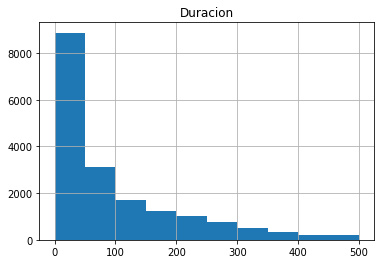

In [6]:
db1.Duracion.describe()
db1.hist(column='Duracion', range= (0,500))

In [7]:
db1.loc[db1.Destino_n == 131].Estado.value_counts()

Contestada       9386
No Válida         211
Perdida           166
Sin respuesta       0
Ocupado             0
FAILED              0
Name: Estado, dtype: int64

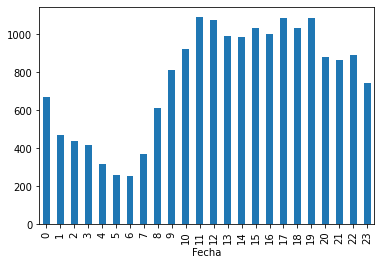

In [8]:
db1.groupby(db1.Fecha.dt.hour).Fecha.count().plot(kind='bar')

# Funciones que me ayudarán a analizar mejor las cosas

In [9]:
def corte_dataset(dataset, inicio= None, fin=None):
    inicio = pd.to_datetime(inicio)
    fin = pd.to_datetime(fin)
    if inicio != None:
        if fin !=None:
            print('Seteado inicio y fin')
            db1 = dataset.loc[
                (dataset.Fecha > inicio) &
                (dataset.Fecha < fin)]
        else:
            fin = inicio + timedelta(days=30)
            print('Seteado inicio, NO fin')
            db1 = dataset.loc[
                (dataset.Fecha > inicio) &
                (dataset.Fecha < fin)]
    else:
        print('No hay rango de fecha seteado. Se procede con todo')
        db1 = dataset
    
    
    print('Rango de fecha: Inicio({}) y fin({})'.format(
        db1.Fecha.describe()['first'],
        db1.Fecha.describe()['last'])
         )
    return db1

corte_dataset(BD, '2020.01.10').head(1) # se suma automáticamente un mes si el fin está vacio

Seteado inicio, NO fin
Rango de fecha: Inicio(2020-01-10 00:01:59) y fin(2020-02-08 23:57:34)


,Fecha,Tipo_llamada,Origen_tipo,Destino_tipo,Origen_n,Destino_n,Destino_nSIP,Estado,Duracion,Cobro,Fin,Trapaso
1025570,2020-01-10 00:01:59,Hacia SAMU,Trunk,SIP,930348984.0,131.0,202.0,Contestada,17,16,2020-01-10 00:02:16,No


In [10]:
def tablaCDR_general(dataset, inicio= None, fin=None):
    # Selecciono un rango de fechas para la función
    db1 = corte_dataset(dataset, inicio, fin)
    
    # Hago las métricas
    descripcion_dum = db1.Fecha.describe()
    var = pd.Series([])
    var['Primera observacion']  = descripcion_dum[4]
    var['Ultima observacion']   = descripcion_dum[5]
    var['Duracion en dias']     = (descripcion_dum[5] - descripcion_dum[4]).days
    var['Duracion en meses']    = (descripcion_dum[5] - descripcion_dum[4]).days/30
    var['Llamadas (n)']         = descripcion_dum[0]
    var['Llamadas (n/mes)']     = var['Llamadas (n)']/var['Duracion en meses']
    var['Llamadas (n/dia)']     = var['Llamadas (n)']/var['Duracion en dias']
    
    var['Llamadas Hacia SAMU/mes']         = db1.loc[db1.Tipo_llamada=='Hacia SAMU'].Fecha.count()/var['Duracion en meses']
    var['Llamadas Hacia SAMU/dia']         = db1.loc[db1.Tipo_llamada=='Hacia SAMU'].Fecha.count()/var['Duracion en dias']
    
    var['Duración llamada prom (min)']     = db1.loc[db1.Tipo_llamada=='Hacia SAMU'].Duracion.mean()/60
    
    var['Llamadas traspasadas/mes']            = db1.loc[db1.Trapaso=='Si'].Fecha.count()/var['Duracion en meses']
    var['Llamadas traspasadas/dia']        = db1.loc[db1.Trapaso=='Si'].Fecha.count()/var['Duracion en dias']
    
    var['Uso horario (%prom)']             = np.mean(          # corresponde al uso de 1 hora de CR
        ((db1.groupby(db1.Fecha.dt.hour)).Duracion.sum())/(var['Duracion en dias']*60)/60 *100)

    var['Llamadas perdidas/mes']       = db1.loc[db1.Estado=='Perdida'].Fecha.count()/var['Duracion en meses']
    var['Llamadas perdidas/dia']       = db1.loc[db1.Estado=='Perdida'].Fecha.count()/var['Duracion en dias']

    return var

In [11]:
def tabla_indicadores(dataset, start=None, **kwargs):
    datelist1 = pd.date_range(start,**kwargs)
    dictado = dict()
    for x in datelist1:
        print(x)
        dictado[
            str(x.strftime("%d%b%y"))] = tablaCDR_general(dataset, x, fin=(pd.to_datetime(x)+datelist1.freq))
    tab = pd.DataFrame(dictado).T
    return tab

tab = tabla_indicadores(BD ,start='2018-01-02', end = '2019-01-01', freq='30D')
tab.head(1)

2018-01-02 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-01-02 00:01:53) y fin(2018-01-31 23:58:01)
2018-02-01 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-02-01 00:01:24) y fin(2018-03-02 23:57:57)
2018-03-03 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-03-03 00:00:55) y fin(2018-04-01 23:47:23)
2018-04-02 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-04-02 00:16:42) y fin(2018-05-01 23:57:57)
2018-05-02 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-05-02 00:00:17) y fin(2018-05-31 23:59:53)


/home/egidio/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


2018-06-01 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-06-01 00:02:03) y fin(2018-06-30 23:59:55)
2018-07-01 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-07-01 00:07:41) y fin(2018-07-30 23:53:13)
2018-07-31 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-07-31 00:10:17) y fin(2018-08-29 23:59:33)
2018-08-30 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-08-30 00:03:47) y fin(2018-09-28 23:56:56)
2018-09-29 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-09-29 00:01:33) y fin(2018-10-28 23:59:29)
2018-10-29 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-10-29 00:00:29) y fin(2018-11-27 23:59:57)
2018-11-28 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-11-28 00:00:26) y fin(2018-12-27 23:57:47)
2018-12-28 00:00:00
Seteado inicio y fin
Rango de fecha: Inicio(2018-12-28 00:00:25) y fin(2019-01-26 23:59:41)


,Primera observacion,Ultima observacion,Duracion en dias,Duracion en meses,Llamadas (n),Llamadas (n/mes),Llamadas (n/dia),Llamadas Hacia SAMU/mes,Llamadas Hacia SAMU/dia,Duración llamada prom (min),Llamadas traspasadas/mes,Llamadas traspasadas/dia,Uso horario (%prom),Llamadas perdidas/mes,Llamadas perdidas/dia
02Jan18,2018-01-02 00:01:53,2018-01-31 23:58:01,29,0.966667,35978,37218.6,1240.62,14301.7,476.724,1.55442,3220.34,107.345,101.742,1171.03,39.0345


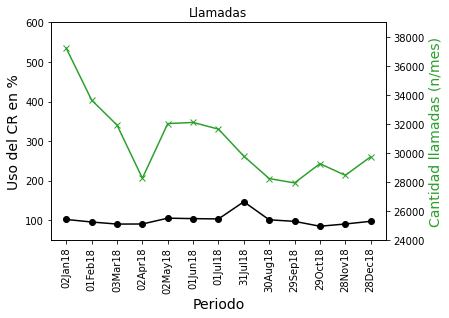

In [12]:
def grafo_usoyllamadas(tabla, titulo=None):
    fig,ax = plt.subplots()
    ax.plot(tabla[['Uso horario (%prom)']], color="black", marker="o")
    ax.set_ylim([50,600])
    ax.set_xlabel("Periodo",fontsize=14)
    ax.title.set_text(titulo)
    plt.xticks(rotation='vertical')
    ax.set_ylabel("Uso del CR en %",color="black",fontsize=14)

    ax2=ax.twinx()
    ax2.plot(tabla[['Llamadas (n/mes)']], color="#2ca02c", marker="x")
    ax2.set_ylim([24000,39000])
    ax2.set_ylabel("Cantidad llamadas (n/mes)",color="#2ca02c",fontsize=14, wrap=True)
grafo_usoyllamadas(tab, 'Llamadas')

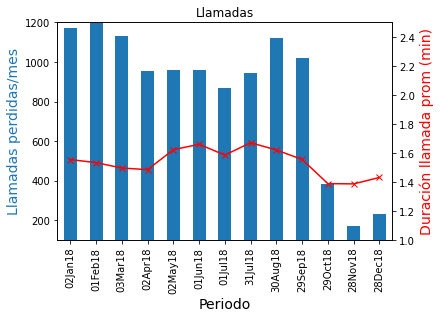

In [13]:
def grafo_perdidasyduracion(tabla, titulo=None):
    fig,ax = plt.subplots()
    tabla['Llamadas perdidas/mes'].plot(kind='bar', color='#1f77b4')
    ax.set_ylim([100,1200])
    ax.set_xlabel("Periodo",fontsize=14)
    ax.title.set_text(titulo)
    plt.xticks(rotation='vertical')
    ax.set_ylabel("Llamadas perdidas/mes",color="#1f77b4",fontsize=14)

    ax2=ax.twinx()
    ax2.plot(tabla[['Duración llamada prom (min)']], color="r", marker="x")
    ax2.set_ylim([1,2.5])
    ax2.set_ylabel("Duración llamada prom (min)",color="r",fontsize=14, wrap=True)
grafo_perdidasyduracion(tab, 'Llamadas')

Seteado inicio y fin
Rango de fecha: Inicio(2018-03-01 00:01:24) y fin(2018-11-29 23:59:41)
Seteado inicio y fin
Rango de fecha: Inicio(2019-03-01 00:03:48) y fin(2019-03-29 23:58:11)
Seteado inicio y fin
Rango de fecha: Inicio(2019-04-01 00:00:36) y fin(2019-04-29 23:53:18)


/home/egidio/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


Seteado inicio y fin
Rango de fecha: Inicio(2019-05-01 00:01:49) y fin(2019-05-29 23:58:48)
Seteado inicio y fin
Rango de fecha: Inicio(2019-09-01 00:05:28) y fin(2019-09-29 23:57:59)
Seteado inicio y fin
Rango de fecha: Inicio(2020-03-01 00:01:13) y fin(2020-03-14 23:52:36)
Seteado inicio y fin
Rango de fecha: Inicio(2020-04-01 00:02:13) y fin(2020-04-29 23:58:03)
Seteado inicio y fin
Rango de fecha: Inicio(2020-05-01 00:00:19) y fin(2020-05-23 23:12:29)


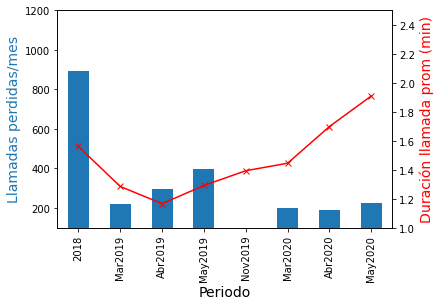

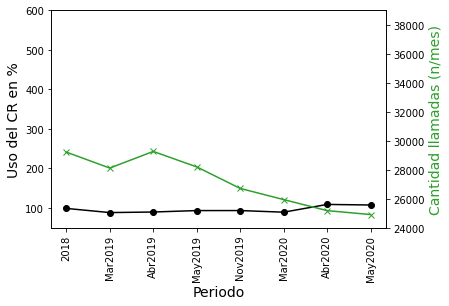

In [14]:
tab = pd.DataFrame({'2018'       : tablaCDR_general(BD, '2018.03.01', '2018-11-30'),
              'Mar2019'    : tablaCDR_general(BD, '2019.03.01', '2019-03-30'),
              'Abr2019'    : tablaCDR_general(BD, '2019.04.01', '2019-04-30'),
              'May2019'    : tablaCDR_general(BD, '2019.05.01', '2019-05-30'),
              'Nov2019'    : tablaCDR_general(BD, '2019.09.01', '2019-09-30'),
              'Mar2020'    : tablaCDR_general(BD, '2020.03.01', '2020-03-15'),
              'Abr2020'    : tablaCDR_general(BD, '2020.04.01', '2020-04-30'),
              'May2020'    : tablaCDR_general(BD, '2020.05.01', '2020-05-30')
             }
            ).T
grafo_perdidasyduracion(tab)
grafo_usoyllamadas(tab)

In [15]:
def DLG_cantidad(dataset, inicio=None, fin=None, ax= None, **kwargs):
    # Selecciono un rango de fechas para la función
    db1 = corte_dataset(dataset, inicio, fin)
    
    # Métricas #######
    metricas = tablaCDR_general(db1) 
    dum_t1 = metricas['Primera observacion']
    dum_t2 = metricas['Ultima observacion']
    dum_dt = metricas['Duracion en dias']
    
    # Gráfico de llamadas por hora ########################################################
    ax = ax or plt.gca()  # si hay ax se queda, si no lo hay lo creo
    (db1.groupby(db1.Fecha.dt.hour).count().Fecha/dum_dt).plot(
        ax = ax,
        label=' {} al {}. '.format(dum_t1.strftime('%d-%b-%Y'), dum_t2.strftime('%d-%b-%Y')),
        **kwargs)
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de llamadas')
    plt.title('Cantidad de llamadas según hora')
    plt.ylim([0,90])
    plt.grid()
    plt.legend(loc='lower right')

In [16]:
def DLG_duracion(dataset, inicio=None, fin=None, ax= None, **kwargs):
    # Selecciono un rango de fechas para la función
    db1 = corte_dataset(dataset, inicio, fin)
    
    # Métricas #######
    metricas = tablaCDR_general(db1) 
    dum_t1 = metricas['Primera observacion']
    dum_t2 = metricas['Ultima observacion']
    dum_dt = metricas['Duracion en dias']
    
    # Gráfico de llamadas por hora ########################################################
    ax = ax or plt.gca()  # si hay ax se queda, si no lo hay lo creo
    ((db1.groupby(db1.Fecha.dt.hour)).Duracion.sum()/(dum_dt*60)).plot(
        ax = ax,
        label=' {} al {}. '.format(dum_t1.strftime('%d-%b-%Y'), dum_t2.strftime('%d-%b-%Y')),
        **kwargs)
    plt.xlabel('Hora del día')
    plt.ylabel('Duración acumulada de llamadas en minutos')
    plt.title('Duración de llamadas por hora')
    plt.ylim([0,140])
    plt.grid()
    plt.legend(loc='lower right')

In [17]:
def bucle_DLG_cantidad(dataset, inicio=None, fin=None, repeticiones=4):
    inicio = pd.to_datetime(inicio)
    for x in range(repeticiones):
        print('Vuelta:', x)
        t1     = inicio + timedelta(days=x*7)
        t2     = t1 + timedelta(days=7)
        DLG_cantidad(dataset, t1, t2)

In [18]:
def bucle_DLG_duracion(dataset, inicio=None, fin=None, repeticiones=4):
    inicio = pd.to_datetime(inicio)
    for x in range(repeticiones):
        print('Vuelta:', x)
        t1     = inicio + timedelta(days=x*7)
        t2     = t1 + timedelta(days=7)
        DLG_duracion(dataset, t1, t2)